<a href="https://colab.research.google.com/github/SlavaKulik/machine_learning/blob/main/practical_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
airquality = pd.read_csv('/content/drive/My Drive/airquality.csv')
print(airquality.shape)
print(airquality.columns)
airquality.head()

(153, 7)
Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')


,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


# Завдання 1

---

Реалізувати методи обробки пропущених значень


In [5]:
# Метод 1 - Видалення пропущенних значень
airquality_1 = airquality.dropna(axis=0)
airquality_1.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
6,7,23.0,299.0,8.6,65,5,7
7,8,19.0,99.0,13.8,59,5,8
8,9,8.0,19.0,20.1,61,5,9
11,12,16.0,256.0,9.7,69,5,12
12,13,11.0,290.0,9.2,66,5,13
13,14,14.0,274.0,10.9,68,5,14


In [6]:
# Метод 2 - заповнення пропущенних значень медіанами
values = {"Ozone":np.mean(airquality['Ozone']), "Solar.R":np.mean(airquality['Solar.R'])}
airquality_2 = airquality.fillna(value = values)
airquality_2.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.00000,190.000000,7.4,67,5,1
1,2,36.00000,118.000000,8.0,72,5,2
2,3,12.00000,149.000000,12.6,74,5,3
3,4,18.00000,313.000000,11.5,62,5,4
4,5,42.12931,185.931507,14.3,56,5,5
5,6,28.00000,185.931507,14.9,66,5,6
6,7,23.00000,299.000000,8.6,65,5,7
7,8,19.00000,99.000000,13.8,59,5,8
8,9,8.00000,19.000000,20.1,61,5,9
9,10,42.12931,194.000000,8.6,69,5,10


In [32]:
# Метод 3 - заповнення пропущенних значень за допомогою інтерполяційних методів
airquality_3 = airquality.fillna(method='ffill')
airquality_3_1 = airquality.fillna(method='ffill')
airquality_3_2 = airquality.fillna(method='ffill')
airquality_3_3 = airquality.fillna(method='ffill')
airquality_3.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,18.0,313.0,14.3,56,5,5
5,6,28.0,313.0,14.9,66,5,6
6,7,23.0,299.0,8.6,65,5,7
7,8,19.0,99.0,13.8,59,5,8
8,9,8.0,19.0,20.1,61,5,9
9,10,8.0,194.0,8.6,69,5,10


# Завдання 2

---
Зробити попередній аналіз значень вибірки шляхом обчислення статистик




Для методу 1



In [36]:
# Основні статистики
airquality_1.agg({'Ozone':['min','max','mean','var','std'], 'Solar.R':['min','max','mean','var','std'], 'Wind':['min','max','mean','var','std'], 'Temp':['min','max','mean','var','std']})

,Ozone,Solar.R,Wind,Temp
min,1.000000,7.000000,2.300000,57.000000
max,168.000000,334.000000,20.700000,97.000000
mean,42.099099,184.801802,9.939640,77.792793
var,1107.290090,8308.742179,12.657324,90.820311
std,33.275969,91.152302,3.557713,9.529969


In [16]:
# Матриця ковариацій
airquality_1.cov()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,2118.851597,210.714496,-354.865356,-29.536929,165.397789,66.602703,72.133415
Ozone,210.714496,1107.290090,1056.583456,-72.511237,221.520721,7.005651,-1.503686
Solar.R,-354.865356,1056.583456,8308.742179,-41.244799,255.467649,-9.947666,-45.838084
Wind,-29.536929,-72.511237,-41.244799,12.657324,-16.857166,-1.019558,1.544889
Temp,165.397789,221.520721,255.467649,-16.857166,90.820311,5.672482,-8.011302
Month,66.602703,7.005651,-9.947666,-1.019558,5.672482,2.171007,-0.115479
Day,72.133415,-1.503686,-45.838084,1.544889,-8.011302,-0.115479,75.815233


In [17]:
# Матриця кореляції
airquality_1.corr()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,1.000000,0.137567,-0.084576,-0.180362,0.377040,0.981999,0.179973
Ozone,0.137567,1.000000,0.348342,-0.612497,0.698541,0.142885,-0.005190
Solar.R,-0.084576,0.348342,1.000000,-0.127183,0.294088,-0.074067,-0.057754
Wind,-0.180362,-0.612497,-0.127183,1.000000,-0.497190,-0.194496,0.049871
Temp,0.377040,0.698541,0.294088,-0.497190,1.000000,0.403972,-0.096546
Month,0.981999,0.142885,-0.074067,-0.194496,0.403972,1.000000,-0.009001
Day,0.179973,-0.005190,-0.057754,0.049871,-0.096546,-0.009001,1.000000


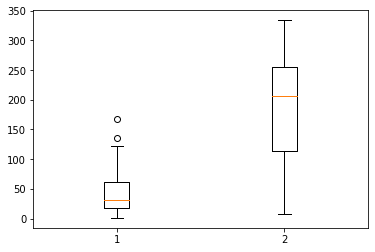

In [21]:
# Коробковий графік (ящик з вусами)
plt.boxplot([airquality_1['Ozone'],airquality_1['Solar.R']])
plt.show()

Для методу 2

In [13]:
  # Основні статистики
  airquality_2.agg({'Ozone':['min','max','mean','var','std'], 'Solar.R':['min','max','mean','var','std'], 'Wind':['min','max','mean','var','std'], 'Temp':['min','max','mean','var','std']})

,Ozone,Solar.R,Wind,Temp
min,1.000000,7.000000,1.700000,56.000000
max,168.000000,334.000000,20.700000,97.000000
mean,42.129310,185.931507,9.957516,77.882353
var,823.309608,7737.008652,12.411539,89.591331
std,28.693372,87.960267,3.523001,9.465270


In [22]:
# Матриця ковариацій
airquality_2.cov()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,1963.500000,181.034596,-395.127433,-26.332895,161.730263,61.500000,75.460526
Ozone,181.034596,823.309608,764.657688,-53.670599,165.328550,6.059381,-2.888271
Solar.R,-395.127433,764.657688,7737.008652,-17.119512,218.606345,-9.083724,-113.544521
Wind,-26.332895,-53.670599,-17.119512,12.411539,-15.272136,-0.889753,0.848852
Temp,161.730263,165.328550,218.606345,-15.272136,89.591331,5.643963,-10.957430
Month,61.500000,6.059381,-9.083724,-0.889753,5.643963,2.006536,-0.099974
Day,75.460526,-2.888271,-113.544521,0.848852,-10.957430,-0.099974,78.579721


In [23]:
# Матриця кореляції
airquality_2.corr()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,1.000000,0.142385,-0.101376,-0.168683,0.385605,0.979797,0.192110
Ozone,0.142385,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355
Solar.R,-0.101376,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621
Wind,-0.168683,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181
Temp,0.385605,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593
Month,0.979797,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962
Day,0.192110,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000


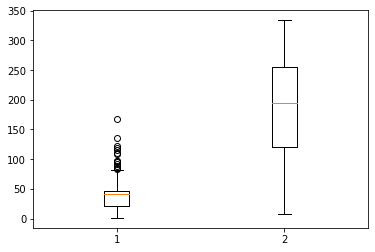

In [24]:
# Коробковий графік (ящик з вусами)
plt.boxplot([airquality_2['Ozone'],airquality_2['Solar.R']])
plt.show()

Для методу 3

In [14]:
# Основні статистики
airquality_3.agg({'Ozone':['min','max','mean','var','std'], 'Solar.R':['min','max','mean','var','std'], 'Wind':['min','max','mean','var','std'], 'Temp':['min','max','mean','var','std']})

,Ozone,Solar.R,Wind,Temp
min,1.000000,7.000000,1.700000,56.000000
max,168.000000,334.000000,20.700000,97.000000
mean,39.784314,186.032680,9.957516,77.882353
var,995.999226,8226.255504,12.411539,89.591331
std,31.559455,90.698707,3.523001,9.465270


In [25]:
# Матриця ковариацій
airquality_3.cov()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,1963.500000,297.289474,-587.513158,-26.332895,161.730263,61.500000,75.460526
Ozone,297.289474,995.999226,679.329463,-54.057250,185.671827,10.577528,-24.555728
Solar.R,-587.513158,679.329463,8226.255504,-2.687418,161.720975,-15.736627,-101.901445
Wind,-26.332895,-54.057250,-2.687418,12.411539,-15.272136,-0.889753,0.848852
Temp,161.730263,185.671827,161.720975,-15.272136,89.591331,5.643963,-10.957430
Month,61.500000,10.577528,-15.736627,-0.889753,5.643963,2.006536,-0.099974
Day,75.460526,-24.555728,-101.901445,0.848852,-10.957430,-0.099974,78.579721


In [26]:
# Матриця кореляції
airquality_3.corr()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
Unnamed: 0,1.000000,0.212586,-0.146184,-0.168683,0.385605,0.979797,0.192110
Ozone,0.212586,1.000000,0.237328,-0.486196,0.621561,0.236609,-0.087774
Solar.R,-0.146184,0.237328,1.000000,-0.008410,0.188379,-0.122486,-0.126743
Wind,-0.168683,-0.486196,-0.008410,1.000000,-0.457988,-0.178293,0.027181
Temp,0.385605,0.621561,0.188379,-0.457988,1.000000,0.420947,-0.130593
Month,0.979797,0.236609,-0.122486,-0.178293,0.420947,1.000000,-0.007962
Day,0.192110,-0.087774,-0.126743,0.027181,-0.130593,-0.007962,1.000000


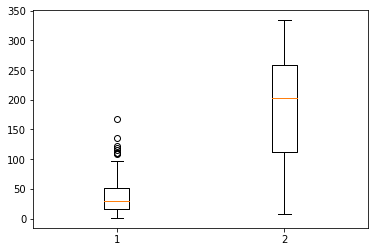

In [27]:
# Коробковий графік (ящик з вусами)
plt.boxplot([airquality_3['Ozone'],airquality_3['Solar.R']])
plt.show()

# Завдання 3

---
Провести нормування даних, які мають великий розкид у значеннях


Для 3 методу

In [33]:
#масштабування ознак спосіб 1
from sklearn.preprocessing import StandardScaler
cols=['Ozone','Solar.R']

scale = StandardScaler().fit_transform(airquality_3_1[cols].values)
airquality_3_1[cols]=scale
airquality_3_1.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,0.038647,0.043885,7.4,67,5,1
1,2,-0.120304,-0.752559,8.0,72,5,2
2,3,-0.883271,-0.409645,12.6,74,5,3
3,4,-0.692530,1.404477,11.5,62,5,4
4,5,-0.692530,1.404477,14.3,56,5,5
5,6,-0.374627,1.404477,14.9,66,5,6
6,7,-0.533578,1.249613,8.6,65,5,7
7,8,-0.660739,-0.962731,13.8,59,5,8
8,9,-1.010432,-1.847669,20.1,61,5,9
9,10,-1.010432,0.088132,8.6,69,5,10


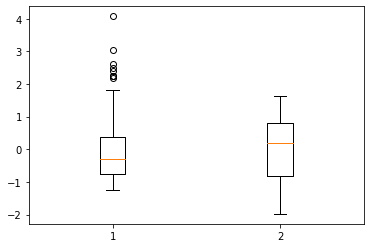

In [37]:
# Коробковий графік (ящик з вусами)
plt.boxplot([airquality_3_1['Ozone'],airquality_3_1['Solar.R']])
plt.show()

In [40]:
airquality_3_1.agg({'Ozone':['min','max','mean','var','std'], 'Solar.R':['min','max','mean','var','std']})

,Ozone,Solar.R
min,-1.232964e+00,-1.980410e+00
max,4.076013e+00,1.636774e+00
mean,9.288140e-17,1.277119e-16
var,1.006579e+00,1.006579e+00
std,1.003284e+00,1.003284e+00


In [34]:
#масштабування ознак спосіб 2
from sklearn.preprocessing import Normalizer
cols=['Ozone','Solar.R']

normal = Normalizer().fit_transform(airquality_3_2[cols].values)
airquality_3_2[cols]=normal
airquality_3_2.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,0.210934,0.977500,7.4,67,5,1
1,2,0.291807,0.956477,8.0,72,5,2
2,3,0.080277,0.996773,12.6,74,5,3
3,4,0.057413,0.998351,11.5,62,5,4
4,5,0.057413,0.998351,14.3,56,5,5
5,6,0.089101,0.996023,14.9,66,5,6
6,7,0.076696,0.997054,8.6,65,5,7
7,8,0.188479,0.982077,13.8,59,5,8
8,9,0.388057,0.921635,20.1,61,5,9
9,10,0.041202,0.999151,8.6,69,5,10


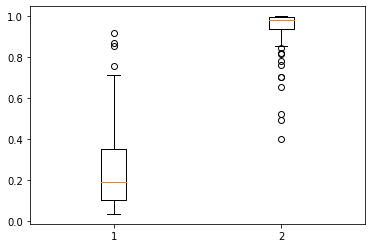

In [38]:
# Коробковий графік (ящик з вусами)
plt.boxplot([airquality_3_2['Ozone'],airquality_3_2['Solar.R']])
plt.show()

In [41]:
airquality_3_2.agg({'Ozone':['min','max','mean','var','std'], 'Solar.R':['min','max','mean','var','std']})

,Ozone,Solar.R
min,0.034355,0.400819
max,0.916157,0.999410
mean,0.244038,0.947693
var,0.034374,0.008227
std,0.185403,0.090701


In [35]:
#масштабування ознак спосіб 3
from sklearn.preprocessing import Normalizer
cols=['Ozone','Solar.R']

normal = Normalizer(norm='l1').fit_transform(airquality_3_3[cols].values)
airquality_3_3[cols]=normal
airquality_3_3.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,0.177489,0.822511,7.4,67,5,1
1,2,0.233766,0.766234,8.0,72,5,2
2,3,0.074534,0.925466,12.6,74,5,3
3,4,0.054381,0.945619,11.5,62,5,4
4,5,0.054381,0.945619,14.3,56,5,5
5,6,0.082111,0.917889,14.9,66,5,6
6,7,0.071429,0.928571,8.6,65,5,7
7,8,0.161017,0.838983,13.8,59,5,8
8,9,0.296296,0.703704,20.1,61,5,9
9,10,0.039604,0.960396,8.6,69,5,10


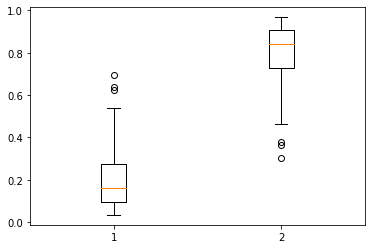

In [39]:
# Коробковий графік (ящик з вусами)
plt.boxplot([airquality_3_3['Ozone'],airquality_3_3['Solar.R']])
plt.show()

In [42]:
airquality_3_3.agg({'Ozone':['min','max','mean','var','std'], 'Solar.R':['min','max','mean','var','std']})

,Ozone,Solar.R
min,0.033233,0.304348
max,0.695652,0.966767
mean,0.193565,0.806435
var,0.016970,0.016970
std,0.130268,0.130268
